In [1]:
from typing import Union, Any, Dict, List, Set

In [2]:
Hashable = Union[int,bool,str,tuple,frozenset]
Num = Union[int,float]
Iterable = Union[list,tuple,set,frozenset]

In [3]:
def media(vetor: Iterable) -> Num:
    return sum(vetor)/len(vetor)

# Tuplas e Dicionários 

**Escreva uma função “inva” em Python que recebe um dicionário d e retorna um dicionário “inverso” do dicionário dado, onde, a cada valor v de d está associada a lista das chaves de d que levam a v. Exemplos:**

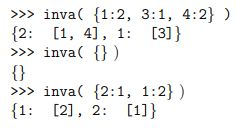



In [4]:
def inva(di: Dict[Hashable,list]) -> Dict[Hashable,list]:
    dic = {}
    for key,value in di.items():
        dic.setdefault(value,[]).append(key)
    return dic
    

In [5]:
print(inva({1 : 2,3 : 1,4 : 2}))
print(inva({2 : 1,1 : 2}))
print(inva({}))

{2: [1, 4], 1: [3]}
{1: [2], 2: [1]}
{}


**Faça uma função que encontre todas as chaves que estão associadas a um determinado valor em um dicionário. A função receberá no primeiro parâmetro o dicionário a ser analisado, e como segundo parâmetro o valor da chave a ser buscada. A função retornará uma lista com as chaves encontradas, essa lista pode ter diversos valores, apenas um ou nenhum. Nos exemplos, a função foi chamada de .**

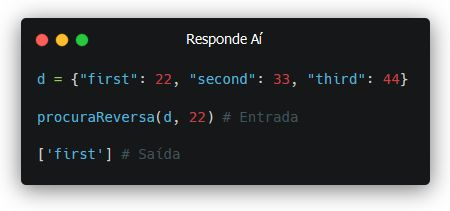

In [6]:
def procuraReversa(dicionario: Dict[Hashable,Any], 
                   valor: Any) -> List[Hashable]:
    lista_retorno=[key for key,value in dicionario.items() 
                   if (value == valor)]
    return lista_retorno

In [7]:
procuraReversa({'first' : 22,'second' : 33,'third' : 44},22)

['first']

**A conta do cartão de crédito de uma pessoa pode ser modelada por um dicionário com os campos saldo, com o saldo devedor da conta, transações, com o número de transações que gerou esse saldo, e média, com a média de gastos por transação. Escreva uma função compra, que recebe como parâmetros o dicionário com a conta e o valor da compra e retorna um novo dicionário para aquela conta, com o saldo devedor, número de transações e média de gastos atualizados.**

In [8]:
def compra(conta: Dict[str,Num],valor: Num) -> dict:
    conta['saldo_devedor'] += valor
    conta['media'] = (conta['media'] * conta['transacoes']+valor) / (conta['transacoes']+1)
    conta['transacoes'] += 1
    return(conta)

In [9]:
conta = {
    'saldo':1000,
    'saldo_devedor':500,
    'transacoes':5,
    'media':600
}

compra(conta,100)

{'saldo': 1000,
 'saldo_devedor': 600,
 'transacoes': 6,
 'media': 516.6666666666666}

**Faça um programa que leia nomes de alunos e suas respectivas notas até que o nome ’oooo’ seja informado, após o fim da leitura, imprima o nome do aluno que possui a maior nota. Obs.: Use dicionário para resolver essa questão.**

In [10]:
#Não usei a retornaNomes
def retornaNomes(turma: Dict[str,Num]) -> None:
    maior_nota = max(set(turma.values()))
    alunos = {aluno for aluno,nota in turma.items() 
              if (nota == maior_nota)}
    for aluno in alunos: print(aluno)

def maximoTurma(turma: Dict[str, Num],chave: str = 'oooo') -> Num:
    copia = turma.copy()
    del copia[chave]
    return(max(set(copia.values())))

def imprimeLista(lista: list) -> None:
    for pessoa in lista: 
        print(pessoa) 

def lerTurma(turma: Dict[str, Num],chave: str = 'oooo') -> None:
    maior_nota = maximoTurma(turma)
    lista = []
    for aluno,nota in turma.items():
        if (aluno == chave): 
            imprimeLista(lista)
            break
        if (nota == maior_nota): 
            lista.append(aluno)

In [11]:
turma = {'João':10,'Pedro':5,'Euler':10,'Israel':7,'Nadja':8,'oooo':11}
lerTurma(turma)

João
Euler


**Escreva uma função, chamada contaVoigais, que conta todas as vogais presentes no texto recebido como parâmetro e retorna um dicionário contendo a quantidade de cada vogal. Escreva um programa a fim de testar sua função, e exiba, no fim, os dados do dicionário retornado.**

In [12]:
def contaVogais(texto: str, 
                vogais: Set[str] = {'a','e','i','o','u'}) -> Dict[str,int]:
    contagem = {vogal:texto.lower().count(vogal) 
                for vogal in vogais}
    return contagem

In [13]:
contaVogais('Eu amo Coca-Cola, bebo todo dia uma garrafa.')

{'o': 6, 'a': 8, 'i': 1, 'e': 2, 'u': 2}

**Escreva um programa para armazenar uma agenda de telefones em um dicionário. Cada pessoa pode ter um ou mais telefones e a chave do dicionário é o nome da pessoa. Seu programa deve ter as seguintes funções: ­**

1. incluirNovoNome – essa função acrescenta um novo nome na agenda, com um ou mais telefones. Ela deve receber como argumentos o nome e os telefones. ­
2. incluirTelefone – essa função acrescenta um telefone em um nome existente na agenda. Caso o nome não exista na agenda, você deve perguntar se a pessoa deseja incluí-­lo. Caso a resposta seja afirmativa, use a função anterior para incluir o novo nome. ­
3. excluirTelefone – essa função exclui um telefone de uma pessoa que já está na agenda. Se a pessoa tiver apenas um telefone, ela deve ser excluída da agenda. ­
4. excluirNome – essa função exclui uma pessoa da agenda. ­
5. consultarTelefone – essa função retorna os telefones de uma pessoa na agenda.

In [14]:
global agenda 
agenda = {}

def incluirNovoNome(nome: str,
                    *args: int) -> None:
    agenda[nome] = {telefone for telefone in args}

def incluirTelefone(nome: str,
                    telefone: int) -> None:
    for pessoa in agenda.keys():
        if (nome == pessoa): 
            agenda[nome].add(telefone) 
            return None
    inclusao = input('Deseja incluir o nome na agenda?(S/N) ')
    if (inclusao == 'S'): 
        incluirNovoNome(nome,telefone)

def excluirTelefone(telefone: int) -> None:
    flag = 0
    for key,valores in agenda.copy().items():
        if(telefone in valores): 
            agenda[key].discard(telefone)
            flag = 1
        if(len(agenda[key]) == 0): 
            del agenda[key] 
            return None
    if(flag == 1): 
        return None  
    print('Esse telefone não se encontra na agenda.')
            
def excluirNome(nome: str) -> None:
    if(agenda.get(nome,False)): 
        del agenda[nome] 
        return None
    print('Esse nome não se encontra na agenda.')
    
def consultarTelefone(nome: str) -> Union[set,None]:
    if(agenda.get(nome,False)): 
        return agenda[nome]
    print('Esse nome não se encontra na agenda.')

In [15]:
agenda = {}
incluirNovoNome('André Marques',95145632,11447523)
print(agenda)
incluirTelefone('Sônia Abrão',123456789)
print(agenda)
excluirTelefone(123456789)
print(agenda)
excluirNome('André Marques')
print(agenda)
excluirNome('Sônia Abrão')
incluirNovoNome('Rafael de Alencar',456123789)
print(consultarTelefone('Rafael de Alencar'))
consultarTelefone('Raul Gil')

{'André Marques': {95145632, 11447523}}
{'André Marques': {95145632, 11447523}}
Esse telefone não se encontra na agenda.
{'André Marques': {95145632, 11447523}}
{}
Esse nome não se encontra na agenda.
{456123789}
Esse nome não se encontra na agenda.


**Escreva um programa que:**

1. lê duas notas de vários alunos e armazena tais notas em um dicionário, onde a chave é o nome do aluno. A entrada de dados deve terminar quando for lida uma string vazia como nome.
2. Escreva uma função que retorna a média do aluno, dado seu nome.
3. Escreva um programa que exiba o nome é a média do aluno de maior média.

In [16]:
#Este exercício é meio estranho porque 
#ele já estaria lendo um dicionário >_>

def leDicionario(dic: Dict[str,List[Num]]) -> Dict[str,List[Num]]:
    retorno = {}
    for key in dic.keys():
        if (key == ''):
            break
        retorno[key] = dic[key]
    return retorno

def retornaMedia(turma: Dict[str,List[Num]],
                 nome: str) -> Union[Num,None]:
    if(turma.get(nome,False)):
        return media(turma[nome])
    else: 
        print('O aluno não se encontra na turma')

def alunoMaiorMedia(turma: Dict[str,List[Num]]) -> Dict[str,Num]:
    media_maxima= max({media(valores) for valores in turma.values()})
    maiores_medias={aluno:media(turma[aluno]) 
                    for aluno,notas in turma.items() 
                    if (media(notas)==media_maxima)}
    return maiores_medias

In [17]:
di = {'Lauro':[10,5],'Lorenzo':[7,6],'João':[3,7]}
dicionario = leDicionario(di)
print(retornaMedia(dicionario,'Lorenzo'))
retornaMedia(dicionario,'Leandro')
print(alunoMaiorMedia(dicionario))

6.5
O aluno não se encontra na turma
{'Lauro': 7.5}


**Três tipos de dados fundamentais em Python são as listas (“lists”), sequências ou ‘tuplas’ (“tuples”) e dicionários (“dictionaries”). A respeito dessas estruturas, é correto afirmar:**
1. Listas não podem ser modificadas depois de criadas, ao passo que sequências e dicionários podem.
2. Listas podem ser modificadas, mas seu tamanho não pode ser modificado após a criação, ao passo que sequências e dicionários não têm essa limitação.
3. Dicionários não podem ser modificados depois de criados, ao passo que listas e sequências podem.
4. Listas e sequências são indexadas por inteiros, ao passo que dicionários podem ser indexados por strings.
5. Listas e dicionários são indexados por inteiros, ao passo que sequências podem ser indexadas por strings.


Somente a número 4 está correta.